## Compare classification with different rounding operators

In [1]:
import numpy as np
import utils.makeDataset as DatasetMaker
from utils.training import show_confusion_matrix, unique_images, get_average_dct, save_model_and_label_encoder
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import os

In [2]:
OUTPUT_DATA_FOLDER = '../output/datasets/'
INPUT_DATA_FOLDER = '../data/'

DATASETS_Q90_d3 = ["floor_Q90_d3", "halfup_Q90_d3", "round_Q90_d3",
                   "trunc_Q90_d3"]  # Q90 with d3 and different roundings

BL_COMPUTE_AVG = False

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

MODELS = {
    "rf": RandomForestClassifier(max_depth=10, random_state=0),
    "adaboost": AdaBoostClassifier(),
    "svm": make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True)),
    "naive_bayes": GaussianNB()
}

### Loading data and preprocessing

In [4]:
from sklearn import preprocessing

X = []
y_labels = []

for current_dataset in DATASETS_Q90_d3:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

floor_Q90_d3
halfup_Q90_d3
round_Q90_d3
trunc_Q90_d3


### Cross val predict for each model to test

               precision    recall  f1-score   support

 floor_Q90_d3       0.93      0.99      0.95       150
halfup_Q90_d3       1.00      0.97      0.99       150
 round_Q90_d3       0.54      0.47      0.50       150
 trunc_Q90_d3       0.56      0.61      0.58       150

     accuracy                           0.76       600
    macro avg       0.76      0.76      0.76       600
 weighted avg       0.76      0.76      0.76       600



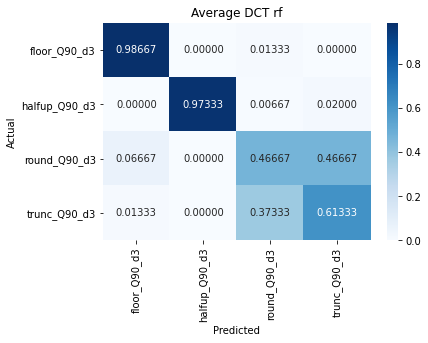

               precision    recall  f1-score   support

 floor_Q90_d3       0.94      0.75      0.83       150
halfup_Q90_d3       1.00      0.92      0.96       150
 round_Q90_d3       0.40      0.65      0.50       150
 trunc_Q90_d3       0.47      0.31      0.38       150

     accuracy                           0.66       600
    macro avg       0.70      0.66      0.67       600
 weighted avg       0.70      0.66      0.67       600



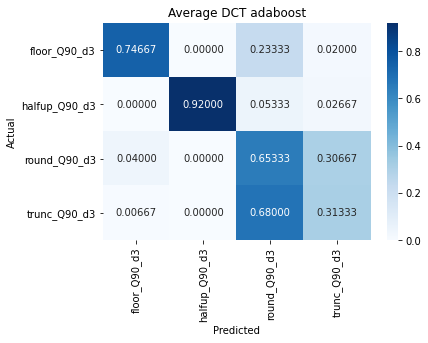

               precision    recall  f1-score   support

 floor_Q90_d3       0.95      0.96      0.95       150
halfup_Q90_d3       1.00      0.99      0.99       150
 round_Q90_d3       0.52      0.45      0.48       150
 trunc_Q90_d3       0.55      0.63      0.59       150

     accuracy                           0.76       600
    macro avg       0.75      0.76      0.75       600
 weighted avg       0.75      0.76      0.75       600



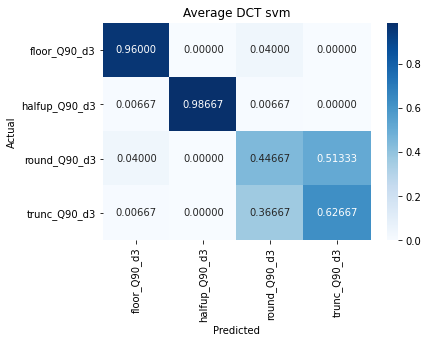

               precision    recall  f1-score   support

 floor_Q90_d3       0.93      0.95      0.94       150
halfup_Q90_d3       1.00      0.89      0.94       150
 round_Q90_d3       0.52      0.42      0.46       150
 trunc_Q90_d3       0.54      0.69      0.60       150

     accuracy                           0.74       600
    macro avg       0.75      0.74      0.74       600
 weighted avg       0.75      0.74      0.74       600



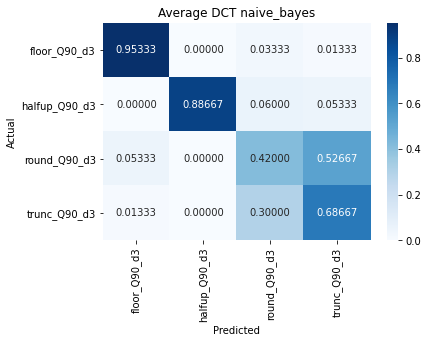

In [5]:
from sklearn.model_selection import cross_val_predict

for model in MODELS.keys():
    y_pred = cross_val_predict(MODELS[model], new_X, new_y, cv=5)
    print(classification_report(new_y, y_pred, target_names=DATASETS_Q90_d3))
    show_confusion_matrix(new_y, y_pred, DATASETS_Q90_d3, f"Average DCT {model}")

### Compare results with datasets made with Q=50 d=d3 and random roundings

               precision    recall  f1-score   support

 floor_Q50_d3       0.99      1.00      1.00       150
halfup_Q50_d3       1.00      0.99      1.00       150
 round_Q50_d3       0.62      0.47      0.53       150
 trunc_Q50_d3       0.57      0.71      0.63       150

     accuracy                           0.79       600
    macro avg       0.79      0.79      0.79       600
 weighted avg       0.79      0.79      0.79       600



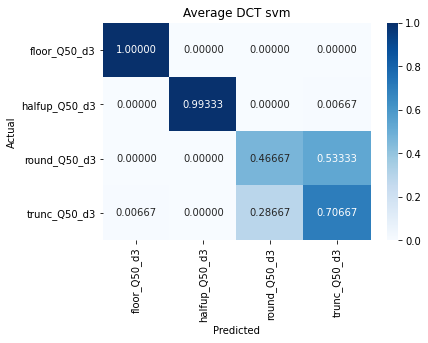

In [6]:
DATASETS_Q50_d3 = ["floor_Q50_d3", "halfup_Q50_d3", "round_Q50_d3",
                   "trunc_Q50_d3"]  # Q50 with d3 and different roundings

X = []
y_labels = []

for current_dataset in DATASETS_Q50_d3:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

model = "svm"
y_pred = cross_val_predict(MODELS[model], new_X, new_y, cv=5)
print(classification_report(new_y, y_pred, target_names=DATASETS_Q50_d3))
show_confusion_matrix(new_y, y_pred, DATASETS_Q50_d3, f"Average DCT {model}")

### Compare results with datasets made with Q=90 d=d2 and random roundings

               precision    recall  f1-score   support

 floor_Q90_d2       0.97      1.00      0.99       150
halfup_Q90_d2       1.00      0.96      0.98       150
 round_Q90_d2       0.54      0.50      0.52       150
 trunc_Q90_d2       0.54      0.59      0.56       150

     accuracy                           0.76       600
    macro avg       0.76      0.76      0.76       600
 weighted avg       0.76      0.76      0.76       600



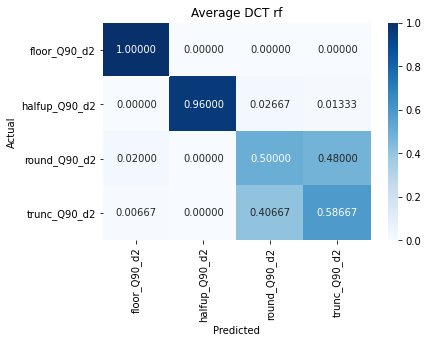

In [7]:
DATASETS_Q90_d2 = ["floor_Q90_d2", "halfup_Q90_d2", "round_Q90_d2",
                   "trunc_Q90_d2"]  # Q50 with d3 and different roundings

X = []
y_labels = []

for current_dataset in DATASETS_Q90_d2:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

model = "rf"
y_pred = cross_val_predict(MODELS[model], new_X, new_y, cv=5)
print(classification_report(new_y, y_pred, target_names=DATASETS_Q90_d2))
show_confusion_matrix(new_y, y_pred, DATASETS_Q90_d2, f"Average DCT {model}")

### Binary classification with round and trunc

              precision    recall  f1-score   support

round_Q90_d3       0.56      0.64      0.60       300
trunc_Q90_d3       0.58      0.51      0.54       300

    accuracy                           0.57       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.57      0.57      0.57       600



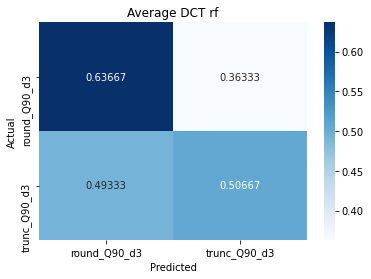

In [8]:
DATASETS_ROUND_TRUNC = ["round_Q90_d3", "trunc_Q90_d3"]  # Q90 with d3 and different roundings
X = []
y_labels = []

for current_dataset in DATASETS_ROUND_TRUNC:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

model = "rf"
y_pred = cross_val_predict(MODELS[model], new_X, new_y, cv=5)
print(classification_report(new_y, y_pred, target_names=DATASETS_ROUND_TRUNC))
show_confusion_matrix(new_y, y_pred, DATASETS_ROUND_TRUNC, f"Average DCT {model}")

### Validation classification for Q90 d3
#### Train model with all training data

In [9]:
DATASETS_VALIDATION = ["floor_Q90_d3", "halfup_Q90_d3", "round_Q90_d3",
                       "trunc_Q90_d3"]  # Q90 with d3 and different roundings

BL_COMPUTE_AVG = False

X = []
y_labels = []

for current_dataset in DATASETS_VALIDATION:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

model_validation = MODELS["rf"].fit(new_X, new_y)

#### Load validation data

In [10]:
from utils.jpegSettingsClassifier import JpegSettingsClassifier

jpegSettingsClassifier = JpegSettingsClassifier()
ground_truth, X_validation = DatasetMaker.load_dataset("validation_d3_Q90_roundings")


def get_y_true_rounding(list_dict_ground_truth):
    return [f"Q{dict_settings['fq']}" for dict_settings in list_dict_ground_truth]


y_true_rounding_labels = get_y_true_rounding(ground_truth)


def transform_label_class(y_rounding_labels):
    y_class = []
    for label in y_rounding_labels:
        if "floor" in label:
            y_class.append(0)
        elif "halfup" in label:
            y_class.append(1)
        elif "round" in label:
            y_class.append(2)
        elif "trunc" in label:
            y_class.append(3)
    return y_class


y_true_class = transform_label_class(y_true_rounding_labels)

#### Prediction on all validation data

               precision    recall  f1-score   support

 floor_Q90_d3       0.78      0.82      0.80        49
halfup_Q90_d3       0.88      0.88      0.88        42
 round_Q90_d3       0.47      0.51      0.49        43
 trunc_Q90_d3       0.50      0.44      0.47        52

     accuracy                           0.66       186
    macro avg       0.66      0.66      0.66       186
 weighted avg       0.65      0.66      0.65       186



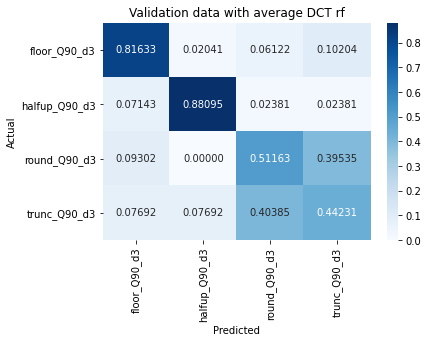

In [11]:
y_pred_class = model_validation.predict(X_validation)
print(classification_report(y_true_class, y_pred_class, target_names=DATASETS_VALIDATION))
show_confusion_matrix(y_true_class, y_pred_class, DATASETS_VALIDATION, f"Validation data with average DCT rf")

### Regroup round and trunc into the same class and predict on validation data

                precision    recall  f1-score   support

         floor       0.82      0.82      0.82        49
        halfup       0.88      0.88      0.88        42
round or trunc       0.89      0.89      0.89        95

      accuracy                           0.87       186
     macro avg       0.86      0.86      0.86       186
  weighted avg       0.87      0.87      0.87       186



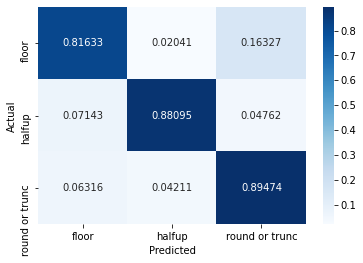

In [12]:
def transform_label_class_custom(y_rounding_labels):
    y_class = []
    for label in y_rounding_labels:
        if "floor" in label:
            y_class.append(0)
        elif "halfup" in label:
            y_class.append(1)
        elif "round" in label or "trunc" in label:
            y_class.append(2)
    return y_class


y_true_class_custom = transform_label_class_custom(y_true_rounding_labels)

DATASETS_VALIDATION_CUSTOM = ["floor_Q90_d3", "halfup_Q90_d3", "round_Q90_d3",
                              "trunc_Q90_d3"]  # Q90 with d3 and different roundings

BL_COMPUTE_AVG = False

X = []
y_labels = []

for current_dataset in DATASETS_VALIDATION_CUSTOM:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    label = current_dataset
    if current_dataset == "trunc_Q90_d3":
        label = "round_Q90_d3"
    y_labels += [label] * len(X_current)
    X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

model_validation_custom = MODELS["rf"].fit(X, y)
labels_names = ["floor", "halfup", 'round or trunc']
y_pred_class = model_validation_custom.predict(X_validation)
print(classification_report(y_true_class_custom, y_pred_class, target_names=labels_names))
show_confusion_matrix(y_true_class_custom, y_pred_class, labels_names)
